In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузим готовый датасет из библиотеки Sklearn

In [2]:
from sklearn import datasets

# Из модуля sklearn.datasets загрузим готовый датасет load_boston() с ценами на недвижимость в Бостоне
boston = datasets.load_boston()

# Переменная boston представляет собой тип данных klearn.utils.Bunch, где значения для матрицы с данными (data), 
# вектора с классами-таргетами (target), а также названия переменных (features) можно извлечь, обращаясь
# к соответствующим ключам (keys):
X = boston.data
y = boston.target
features = boston.feature_names
print(X.shape)
print(y.shape)

(506, 13)
(506,)


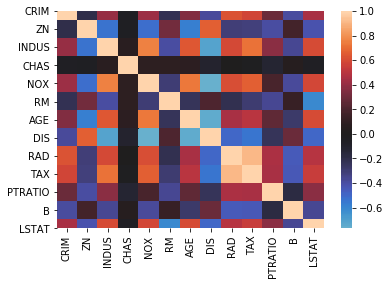

In [3]:
# Построим матрицу корреляции между признаками
corr_matrix = np.corrcoef(X.T)
sns.heatmap(corr_matrix, xticklabels=features, yticklabels=features, center=0)

# Множественная линейная регрессия, используя библиотеку Sklearn

In [4]:
from sklearn.linear_model import LinearRegression

# Модель для множественной линейной регрессии в scikit-learn ничем не отличается от 
# модели обычной линейной регресии (линейная регрессия с одной независимой переменной (предиктором) х)

# Создаем объект модели линейной регресии
multiple_regr = LinearRegression()

# Тренируем модель на входных данных при помощи метода fit()
multiple_regr.fit(X, y)

# Получаем коэффициенты регресии с помощью аттрибутов coef_ и intercept_
# Получаем коэффициент детерминации R-squared с помощью метода score()
print("Intercept: ", multiple_regr.intercept_)
print("Slope coefficients: \n", multiple_regr.coef_)
print("\nR^2: ", multiple_regr.score(X, y))

Intercept:  36.459488385090125
Slope coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

R^2:  0.7406426641094095


In [5]:
#new_house = np.array([3.6, 11.36, 11.13, 0.07, 0.55, 6.28, 68.5, 3.79, 9.54, 408.23, 18.45, 356.67,12.65]).reshape(1,-1)
new_house = np.array([[3.6, 11.36, 11.13, 0.07, 0.55, 6.28, 68.5, 3.79, 9.54, 408.23, 18.45, 356.67,12.65],\
                     [3.68, 11.0, 11.0, 0.20, 0.65, 6.17, 67.9, 5, 12, 420, 18.01, 357,10]])

# Создадим новые данные (дом) для проверки модели
# Для этого возьмем первый дом из датасета Х и немного рандомизируем значения признаков 
# путем добавления небольшого случайного числа, взятого в отношении изначальной шкалы того или иного признака 
# (+- 25% для каждого признака)
new_house = X[0, :] + X[0,:]*np.random.uniform(low=-0.25, high=0.25, size=(X.shape[1]))
# Используем команду reshape(), чтобы изменить форму (размерность) вектора и превратить его в матрицу 13x1
new_house = new_house.reshape(1,-1)
print(new_house.shape)

# Предположим, что реальная стоимость такого дома примерно равна стоимости первого дома из датасета +- 25% от его стоимости
y_real = y[0] + y[0]*np.random.uniform(low=-0.25, high=0.25)
# Используем команду reshape(), чтобы изменить форму (размерность) числа и превратить его в вектор 1x1
y_real = y_real.reshape(-1,1)
print("Real price: ", y_real)

# Получим предсказание стоимости для нового дома при помощи метода predict()
y_pred = multiple_regr.predict(new_house)
print("Predicted price: ", y_pred)

# Найдем 3 вида ошибки - MAE, MSE и RMSE для реального и предсказанного значения

# Для этого импортируем из  sklearn модуль metrics
from sklearn import metrics 

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_real, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_real, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_real, y_pred)))

(1, 13)
Real price:  [[19.34999378]]
Predicted price:  [35.83569849]

Mean Absolute Error: 16.485704715379562
Mean Squared Error: 271.7784599626879
Root Mean Squared Error: 16.485704715379562


# Множественная линейная регрессия, используя библиотеку Statmodels.api

In [6]:
import statsmodels.api as sm

X = boston.data
X = sm.add_constant(X)
y = boston.target

model = sm.OLS(y, X).fit()
intercept = model.params[0]
slopes  = model.params[1:]
r_squared = model.rsquared

print("Model parameters: ")
print("Intercept: ", intercept)
print("Slope coefficients: \n", slopes)
print("\nR^2: ",r_squared )
model.summary()

Model parameters: 
Intercept:  36.45948838509005
Slope coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

R^2:  0.7406426641094095


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        22:38:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""